In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file and store as netflix_df:
netflix_df = pd.read_csv('~/Library/Mobile Documents/com~apple~CloudDocs/LC_DA/Git/Projects/NetflixProject/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Filter the data to remove TV shows and store as netflix_subset:
netflix_subset = netflix_df[netflix_df.type != 'TV Show']
netflix_subset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [3]:
# Investigate the Netflix movie data, keeping only the columns "title", "country", "genre", "release_year", "duration", and saving this into a new DataFrame called netflix_movies.
netflix_movies = netflix_subset.drop(labels = ['show_id', 'type', 'director', 'cast', 'date_added', 'description'], axis=1)
netflix_movies.head()

,title,country,release_year,rating,duration,listed_in
0,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries
6,My Little Pony: A New Generation,NaN,2021,PG,91 min,Children & Family Movies
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
9,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas"
12,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"


In [4]:
netflix_movies.shape

(6131, 6)

In [5]:
netflix_movies = netflix_movies.dropna()
netflix_movies.shape

(5687, 6)

In [6]:
def numeric(series):
    series = str(series)
    series = series.strip('min')
    series = series.strip('a')
    series = series.strip()
    series = int(series)
    return series

netflix_movies['duration_num'] = netflix_movies['duration'].apply(numeric)
netflix_movies.head()

,title,country,release_year,rating,duration,listed_in,duration_num
0,Dick Johnson Is Dead,United States,2020,PG-13,90 min,Documentaries,90
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125
9,The Starling,United States,2021,PG-13,104 min,"Comedies, Dramas",104
12,Je Suis Karl,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies",127
24,Jeans,India,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",166


In [7]:
# Filter netflix_movies to find the movies that are shorter than 60 minutes, saving the resulting DataFrame as short_movies; inspect the result to find possible contributing factors.
short_movies = netflix_movies[netflix_movies.duration_num <60]
short_movies['duration_num'].describe()

count    369.000000
mean      42.463415
std       13.720399
min        3.000000
25%       29.000000
50%       46.000000
75%       54.000000
max       59.000000
Name: duration_num, dtype: float64

In [8]:
# Using a for loop and if/elif statements, iterate through the rows of netflix_movies and assign colors of your choice to four genre groups. Save the results in a colors list. 
def colors(series):
    for movie in series:
        if 'Children' in series:
            return 'Blue'
        elif 'Action' in series:
            return 'Orange'
        elif 'Dramas'in series:
            return 'Green'
        else:
            return 'Red'
            
colors = short_movies['listed_in'].apply(colors)
short_movies.head()

,title,country,release_year,rating,duration,listed_in,duration_num
279,Monster Hunter: Legends of the Guild,"United States, Japan",2021,TV-PG,59 min,"Action & Adventure, Anime Features, Children &...",59
694,Aziza,"Lebanon, Syria",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",13
766,Alan Saldaña: Locked Up,Mexico,2021,TV-MA,49 min,Stand-Up Comedy,49
769,From Stress to Happiness,Argentina,2020,TV-G,58 min,"Documentaries, International Movies",58
975,Shadow and Bone - The Afterparty,United States,2021,TV-14,33 min,"Action & Adventure, Comedies, Dramas",33


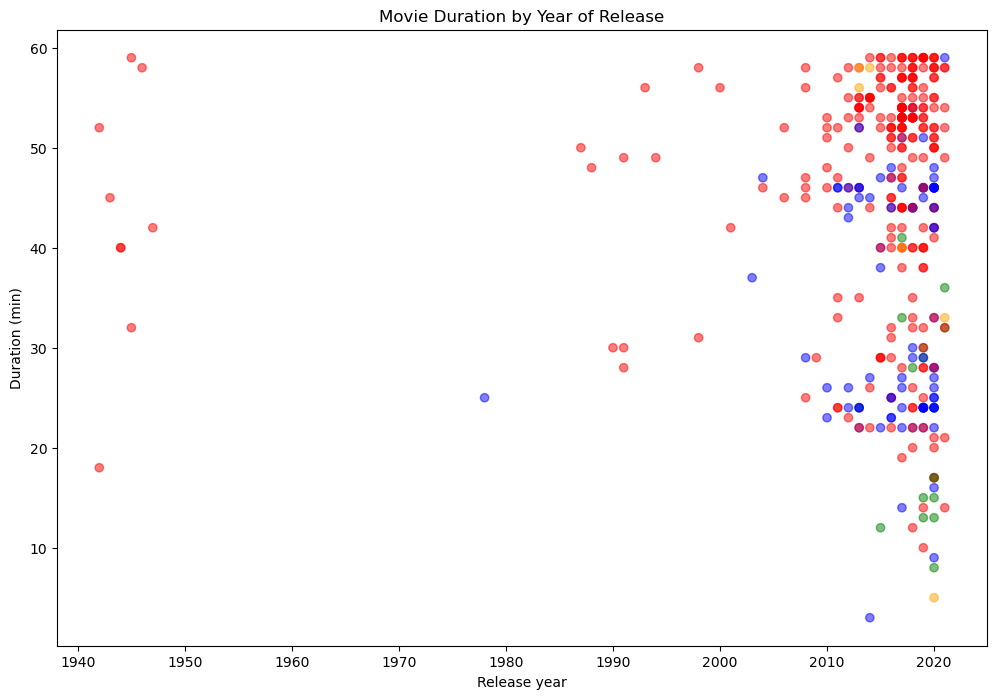

In [9]:
# Initialize a figure object called fig and create a scatter plot for movie duration by release year using the colors list to color the points and using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".
fig = plt.figure(figsize=(12,8))
plt.scatter('release_year', 'duration_num', data=short_movies, c=colors, alpha=0.5)
plt.xticks()
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show(fig)

In [10]:
#Does year predict duration of movie? - No

import numpy as np
from sklearn.linear_model import LinearRegression

x = netflix_movies['release_year'].array.reshape(-1, 1)
y = netflix_movies['duration_num'].array.reshape(-1, 1)
model = LinearRegression()
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.038564438449792515
intercept: [1195.37259131]
slope: [[-0.54393242]]


In [11]:
# class LinearRegression:
#    def fit(self,X,Y):
#        X=netflix_movies['release_year'].array.reshape(-1, 1)
#        Y=netflix_movies['duration_num'].array.reshape(-1, 1)
       
#        x_shape = X.shape
       
#        num_var = x_shape[1]
#        weight_matrix = np.random.normal(0,1,(num_var,1))
#        intercept = np.random.rand(1)
#        for i in range(50):
#            dcostdm = np.sum(np.multiply(((np.matmul(X,weight_matrix)+intercept)-Y),X))*2/x_shape[0]
#            dcostdc = np.sum(((np.matmul(X,weight_matrix)+intercept)-Y))*2/x_shape[0]
#            weight_matrix -= 0.1*dcostdm
#            intercept -= 0.1*dcostdc
#        return weight_matrix,intercept

# reg = LinearRegression()
# x = (netflix_movies['release_year']-netflix_movies['release_year'].mean())/netflix_movies['release_year'].std()
# y = (netflix_movies['duration_num']-netflix_movies['duration_num'].mean())/netflix_movies['duration_num'].std()
# params = reg.fit(x,y)
# plt.scatter(x,y)
# pred = np.matmul(np.array(x).reshape(-1,1),params[0])+params[1]
# plt.plot(x,pred)
# print(params)